# Titanic Dataset
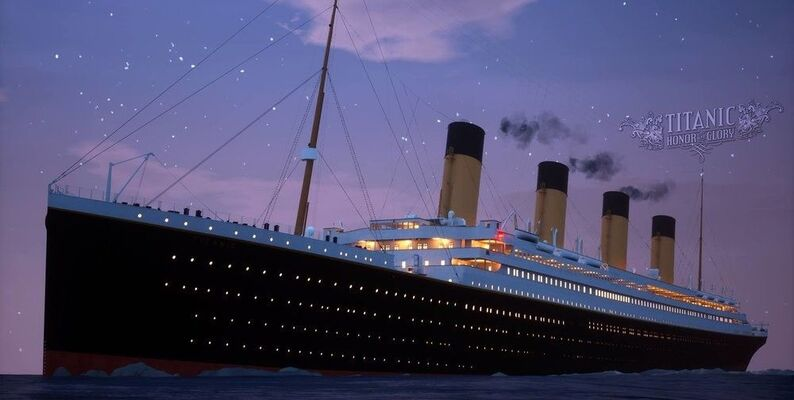

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
# Load training data
train_data = pd.read_csv('train.csv')

# Load test data
test_data = pd.read_csv('test.csv')

# Load gender submission data
gender_submission = pd.read_csv('gender_submission.csv')

In [48]:
# Display basic information about the training data
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [49]:
# Display summary statistics
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


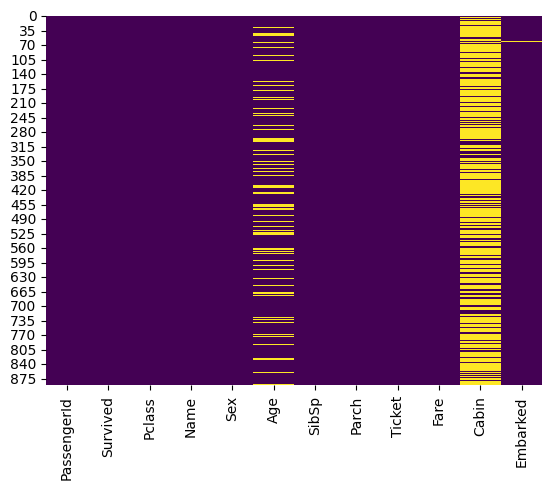

In [50]:
# Visualize missing data
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [51]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

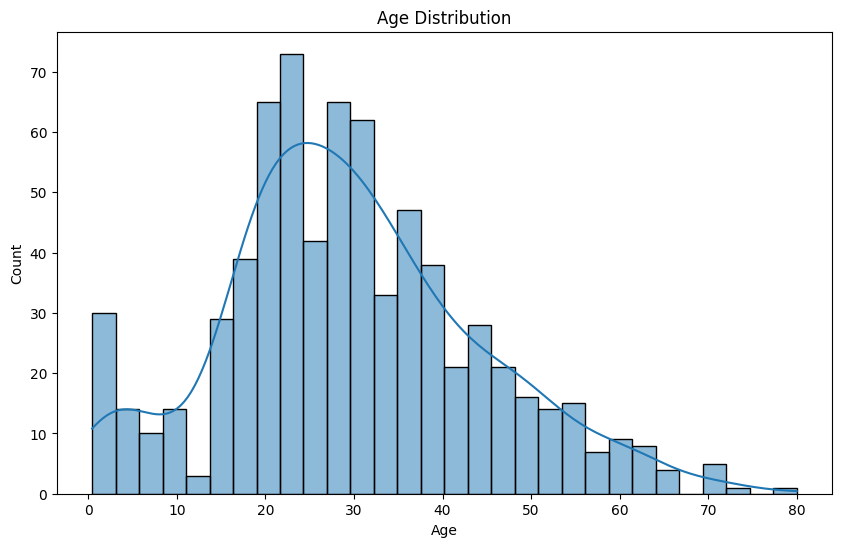

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

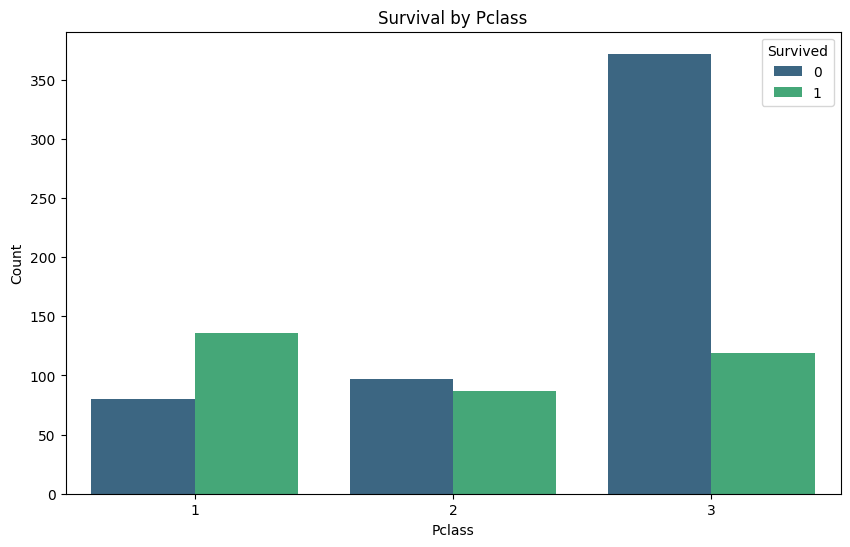

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

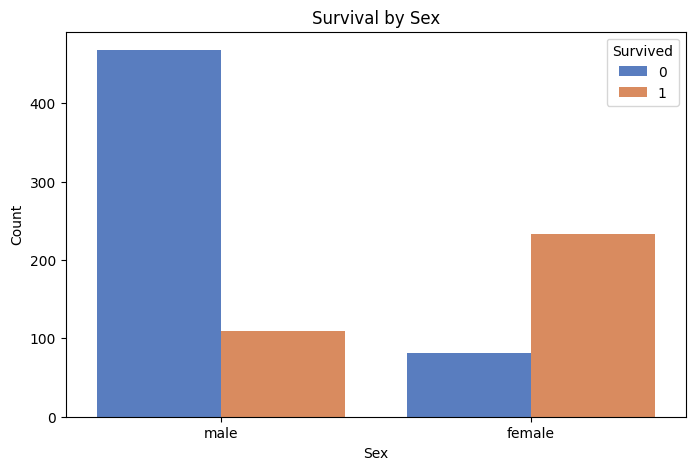

In [54]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='muted')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

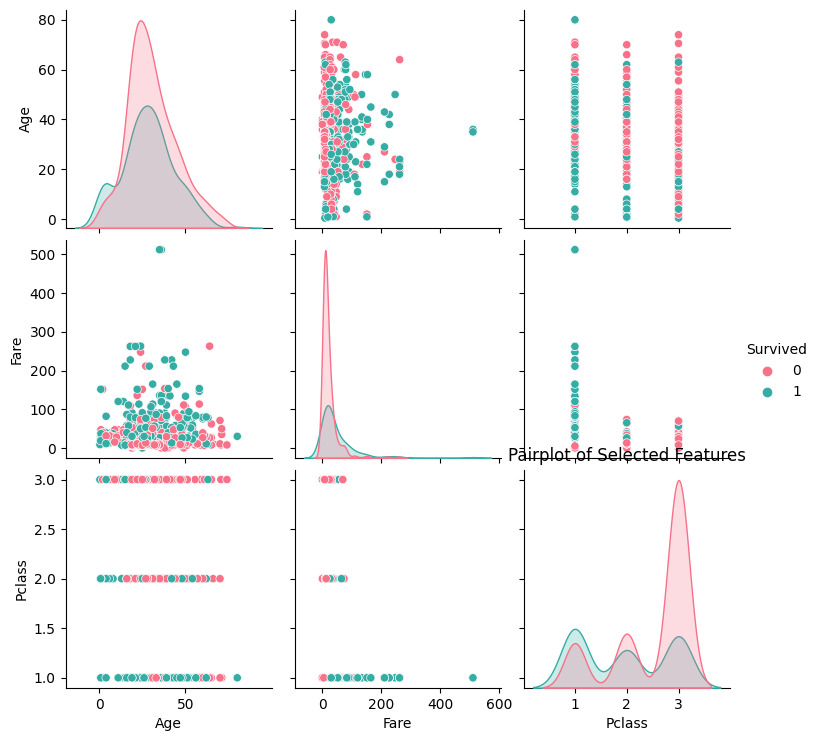

In [55]:
selected_features = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(train_data[selected_features], hue='Survived', palette='husl')
plt.title('Pairplot of Selected Features')
plt.show()

In [56]:
# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
train_data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Convert categorical variables to numerical
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

In [57]:
# Create a new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Drop unnecessary columns
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [58]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

In [59]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Predict on validation set
y_pred = model.predict(X_valid)

# Evaluate the model
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))
print("Classification Report:\n", classification_report(y_valid, y_pred))

Accuracy: 0.8324022346368715
Confusion Matrix:
 [[98 16]
 [14 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       114
           1       0.76      0.78      0.77        65

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



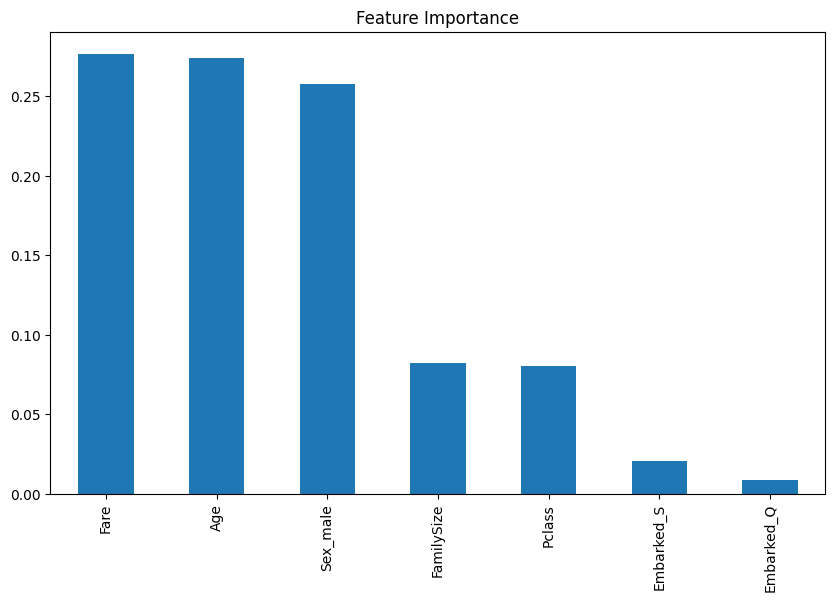

In [61]:
# Display feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

# END